# Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The input data has been pre-loaded as input_data, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in weights['node_0'], and the array of weights for the second node in the hidden layer are in weights['node_1'].

The weights feeding into the output node are available in weights['output'].

NumPy will be pre-imported for you as np in all exercises.

* Calculate the value in node 0 by multiplying input_data by its weights weights['node_0'] and computing their sum. This is the 1st node in the hidden layer.
* Calculate the value in node 1 using input_data and weights['node_1']. This is the 2nd node in the hidden layer.
* Put the hidden layer values into an array. This has been done for you.
* Generate the prediction by multiplying hidden_layer_outputs by weights['output'] and computing their sum.

In [12]:
import numpy as np

input_data = np.array([3, 5])

weights = { 'node_0' : np.array([2,4]),
            'node_1' : np.array([4,-5]),
            'output' : np.array([2,7])}

In [13]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


# The Rectified Linear Activation Function
As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
relu(3) = 3 
relu(-3) = 0 

Fill in the definition of the relu() function:
Use the max() function to calculate the value for the output of relu().
Apply the relu() function to node_0_input to calculate node_0_output.
Apply the relu() function to node_1_input to calculate node_1_output.

In [14]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


# Applying the network to many observations/rows of data
You'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the relu() function you defined in the previous exercise has been pre-loaded.

Define a function called predict_with_network() that accepts two arguments - input_data_row and weights - and returns a prediction from the network as the output.
Calculate the input and output values for each node, storing them as: node_0_input, node_0_output, node_1_input, and node_1_output.
To calculate the input value of a node, multiply the relevant arrays together and compute their sum.
To calculate the output value of a node, apply the relu() function to the input value of the node.
Calculate the model output by calculating input_to_final_layer and model_output in the same ay you calculated the input and output values for the nodes.
Use a for loop to iterate over input_data:
Use your predict_with_network() to generate predictions for each row of the input_data - input_data_row. Append each prediction to results.

In [27]:
# Define predict_with_network()
def predict_with_network_weights(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


input_data = np.array([[3, 5], [ 1, -1], [0, 0], [8, 4]])


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
        

[182, 144, 0, 416]


# Multi-layer neural networks
In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

We then create a model output from the hidden nodes using weights pre-loaded as weights['output'].

Calculate node_0_0_input using its weights weights['node_0_0'] and the given input_data. Then apply the relu() function to get node_0_0_output.
Do the same as above for node_0_1_input to get node_0_1_output.
Calculate node_1_0_input using its weights weights['node_1_0'] and the outputs from the first hidden layer - hidden_0_outputs. Then apply the relu() function to get node_1_0_output.
Do the same as above for node_1_1_input to get node_1_1_output.
Calculate model_output using its weights weights['output'] and the outputs from the second hidden layer hidden_1_outputs array. Do not apply the relu() function to this output.

In [29]:
input_data = np.array([3, 5])

weights = { 'node_0_0': np.array([2, 4]),
            'node_0_1': np.array([ 4, -5]),
            'node_1_0': np.array([-1,  2]),
            'node_1_1': np.array([1, 2]),
            'output': np.array([2, 7])}


def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_0_1_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs*weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)


182


# Coding how weight changes affect accuracy
Now you'll get to change weights in a real network and see how they affect model accuracy!

Have a look at the following neural network: Ch2Ex4

Its weights have been pre-loaded as weights_0. Your task in this exercise is to update a single weight in weights_0 to create weights_1, which gives a perfect prediction (in which the predicted value is equal to target_actual: 3).

Use a pen and paper if necessary to experiment with different combinations. You'll use the predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

* Create a dictionary of weights called weights_1 where you have changed 1 weight from weights_0 (You only need to make 1 edit to weights_0 to generate the perfect prediction).
* Obtain predictions with the new weights using the predict_with_network() function with input_data and weights_1.
* Calculate the error for the new weights by subtracting target_actual from model_output_1.

In [30]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network_weights(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network_weights(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)


6
0


# Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.

input_data is a list of arrays. Each item in that list contains the data to make a single prediction. target_actuals is a list of numbers. Each item in that list is the actual value we are trying to predict.

In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. It takes the true values and the predicted values as arguments.

You'll also use the preloaded predict_with_network() function, which takes an array of data as the first argument, and weights as the second argument.

* Import mean_squared_error from sklearn.metrics.
* Using a for loop to iterate over each row of input_data:
* Make predictions for each row with weights_0 using the predict_with_network() function and append it to model_output_0.
* Do the same for weights_1, appending the predictions to model_output_1.
* Calculate the mean squared error of model_output_0 and then model_output_1 using the mean_squared_error() function. The first argument should be the actual values (target_actuals), and the second argument should be the predicted values (model_output_0 or model_output_1).

In [36]:
input_data = np.array([[0, 3],[1, 2], [-1, -2], [4, 0]])

weights_0 = {'node_0': np.array([2, 1]), 
             'node_1': np.array([1, 2]), 
             'output': np.array([1, 1])}

weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1. , 1.5]),
             'output': np.array([1. , 1.5])}

target_actuals = [1, 3, 5, 7]

In [40]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network_weights(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network_weights(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


# Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector). In this case, the output will also be a vector, which is exactly what you want.

You're ready to write the code to calculate this slope while using a single data point. You'll use pre-defined weights called weights as well as data for a single point called input_data. The actual value of the target you want to predict is stored in target.

* Calculate the predictions, preds, by multiplying weights by the input_data and computing their sum.
* Calculate the error, which is target minus preds. Notice that this error corresponds to y-xb in the gradient expression.
* Calculate the slope of the loss function with respect to the prediction. To do this, you need to take the product of input_data and error and multiply that by 2.

In [108]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

In [102]:
# Calculate the predictions: preds
preds = (input_data*weights).sum()

# Calculate the error: error
error = target - preds

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)


[-14 -28 -42]


# Improving model weights
Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to improve your model. If you add the slopes to your weights, you will move in the right direction. However, it's possible to move too far in that direction. So you will want to take a small step in that direction first, using a lower learning rate, and verify that the model is improving.

The weights have been pre-loaded as weights, the actual value of the target as target, and the input data as input_data. The predictions from the initial weights are stored as preds.

* Set the learning rate to be 0.01 and calculate the error from the original predictions. This has been done for you.
* Calculate the updated weights by subtracting the product of learning_rate and slope from weights.
* Calculate the updated predictions by multiplying weights_updated with input_data and computing their sum.
* Calculate the error for the new predictions. Store the result as error_updated.

In [103]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate*slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)


7
5.04


# Making multiple updates to weights
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.

To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.

This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.

We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.

* Using a for loop to iteratively update weights:
* Calculate the slope using the get_slope() function.
* Update the weights using a learning rate of 0.01.
* Calculate the mean squared error (mse) with the updated weights using the get_mse() function.
* Append mse to mse_hist.

In [114]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

def get_slope(input_data, target, weigths):
    # Calculate the predictions: preds
    preds = (weights * input_data).sum()

    # Calculate the error: error
    error = preds - target

    # Calculate the slope: slope
    slope = 2 * input_data * error
    
    return slope

def get_mse(input_data, target, weigths):
    model_output = np.array([(input_data * weights).sum()])
    target_ = np.array([target])
    mse = mean_squared_error(target_, model_output)
    return mse
    

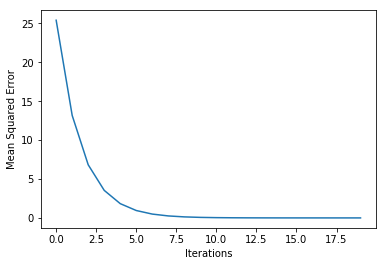

In [115]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()